### this lab is not finished. I made some mistakes and will redo it over the weekend

In [499]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import numpy as np
password = getpass.getpass()

········


In [578]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

## Create sql query and read data into dataframe

In [624]:
query_f = '''SELECT
    f.film_id,
	f.title,
    l.name AS 'language',
    f.rental_rate,
    f.length,
    f.rating,
    f.special_features,
    c.name AS 'category'
    FROM film f
JOIN film_category ca USING(film_id)
JOIN category c USING(category_id)
JOIN language l USING(language_id);
'''

In [674]:
data = pd.read_sql_query(query_f, engine)
data.head()

,film_id,title,language,rental_rate,length,rating,special_features,category
0,19,AMADEUS HOLY,English,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action
1,21,AMERICAN CIRCUS,English,4.99,129,R,"Commentaries,Behind the Scenes",Action
2,29,ANTITRUST TOMATOES,English,2.99,168,NC-17,"Trailers,Commentaries,Deleted Scenes",Action
3,38,ARK RIDGEMONT,English,0.99,68,NC-17,"Trailers,Commentaries,Deleted Scenes,Behind th...",Action
4,56,BAREFOOT MANCHURIAN,English,2.99,129,G,"Trailers,Commentaries",Action


In [675]:
data.shape

(1000, 8)

In [676]:
query_r = '''SELECT f.film_id, r.rental_date, MONTH(r.rental_date) AS 'month'
FROM rental r
JOIN inventory i USING(inventory_id)
JOIN film f USING(film_id);'''

In [677]:
data2 = pd.read_sql_query(query_r, engine)
data2.head()

,film_id,rental_date,month
0,1,2005-07-08 19:03:15,7
1,1,2005-08-02 20:13:10,8
2,1,2005-08-21 21:27:43,8
3,1,2022-09-19 17:15:26,9
4,1,2005-05-30 20:21:07,5


In [678]:
data2.shape

(16045, 3)

In [679]:
data2.dtypes

film_id                 int64
rental_date    datetime64[ns]
month                   int64
dtype: object

## Create boolean indicating if movie was rented in May 2005

In [680]:
may_rental = []

for x in data2['month']:
    if x == 5:
        may_rental.append(1)
    else:
        may_rental.append(0)
                
data2['may_rental'] = may_rental                        

In [681]:
data2

,film_id,rental_date,month,may_rental
0,1,2005-07-08 19:03:15,7,0
1,1,2005-08-02 20:13:10,8,0
2,1,2005-08-21 21:27:43,8,0
3,1,2022-09-19 17:15:26,9,0
4,1,2005-05-30 20:21:07,5,1
...,...,...,...,...
16040,1000,2005-05-29 03:49:03,5,1
16041,1000,2005-06-15 21:50:32,6,0
16042,1000,2005-07-12 13:24:47,7,0
16043,1000,2005-07-31 07:32:21,7,0


## Analyze and transform data

In [682]:
data.isna().sum()

film_id             0
title               0
language            0
rental_rate         0
length              0
rating              0
special_features    0
category            0
dtype: int64

In [683]:
data2.isna().sum()

film_id        0
rental_date    0
month          0
may_rental     0
dtype: int64

In [684]:
merged_data = pd.merge(left = data,
                      right = data2,
                      how = 'inner',
                      left_on = 'film_id',
                      right_on = 'film_id')

display(merged_data)

,film_id,title,language,rental_rate,length,rating,special_features,category,rental_date,month,may_rental
0,19,AMADEUS HOLY,English,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,2005-08-02 01:16:59,8,0
1,19,AMADEUS HOLY,English,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,2005-08-18 04:26:54,8,0
2,19,AMADEUS HOLY,English,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,2005-06-20 20:35:28,6,0
3,19,AMADEUS HOLY,English,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,2005-07-09 05:01:58,7,0
4,19,AMADEUS HOLY,English,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,2005-07-30 08:02:39,7,0
...,...,...,...,...,...,...,...,...,...,...,...
16040,989,WORKING MICROCOSMOS,English,4.99,74,R,"Commentaries,Deleted Scenes",Travel,2005-05-30 18:45:17,5,1
16041,989,WORKING MICROCOSMOS,English,4.99,74,R,"Commentaries,Deleted Scenes",Travel,2005-06-15 09:03:52,6,0
16042,989,WORKING MICROCOSMOS,English,4.99,74,R,"Commentaries,Deleted Scenes",Travel,2005-07-07 06:38:31,7,0
16043,989,WORKING MICROCOSMOS,English,4.99,74,R,"Commentaries,Deleted Scenes",Travel,2005-07-30 00:12:41,7,0


In [685]:
merged_data.isna().sum()

film_id             0
title               0
language            0
rental_rate         0
length              0
rating              0
special_features    0
category            0
rental_date         0
month               0
may_rental          0
dtype: int64

In [686]:
# checking which columns to keep for now. As language is only English I don't need it.
merged_data['language'].value_counts(dropna=False)

English    16045
Name: language, dtype: int64

In [687]:
#will also not keep this column as every move has some sort of special feature and its too difficult to encode for now
merged_data['special_features'].value_counts(dropna=False)

Trailers,Commentaries,Behind the Scenes                   1320
Trailers                                                  1151
Trailers,Commentaries                                     1140
Trailers,Behind the Scenes                                1137
Behind the Scenes                                         1114
Commentaries,Deleted Scenes,Behind the Scenes             1112
Commentaries                                              1101
Commentaries,Behind the Scenes                            1093
Trailers,Deleted Scenes                                   1065
Deleted Scenes,Behind the Scenes                          1050
Deleted Scenes                                            1037
Commentaries,Deleted Scenes                               1020
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    1003
Trailers,Commentaries,Deleted Scenes                       922
Trailers,Deleted Scenes,Behind the Scenes                  780
Name: special_features, dtype: int64

In [688]:
merged_data.columns

Index(['film_id', 'title', 'language', 'rental_rate', 'length', 'rating',
       'special_features', 'category', 'rental_date', 'month', 'may_rental'],
      dtype='object')

In [689]:
merged_data = merged_data[['film_id', 'title', 'rental_rate', 'length', 'rating', 'category', 'may_rental']]

In [690]:
merged_data.shape

(16045, 7)

In [691]:
merged_data['may_rental'] = merged_data['may_rental'].apply(bool)    

In [692]:
merged_data.dtypes

film_id          int64
title           object
rental_rate    float64
length           int64
rating          object
category        object
may_rental        bool
dtype: object

In [693]:
data_may = merged_data[merged_data['may_rental'] == True]
data_may.head()

,film_id,title,rental_rate,length,rating,category,may_rental
6,19,AMADEUS HOLY,0.99,113,PG,Action,True
21,21,AMERICAN CIRCUS,4.99,129,R,Action,True
26,21,AMERICAN CIRCUS,4.99,129,R,Action,True
43,29,ANTITRUST TOMATOES,2.99,168,NC-17,Action,True
48,29,ANTITRUST TOMATOES,2.99,168,NC-17,Action,True


In [694]:
print(data_may.duplicated().sum())

470


In [695]:
data_may = data_may.drop_duplicates()
data_may = data_may.reset_index(drop=True)

In [696]:
data_may.head()

,film_id,title,rental_rate,length,rating,category,may_rental
0,19,AMADEUS HOLY,0.99,113,PG,Action,True
1,21,AMERICAN CIRCUS,4.99,129,R,Action,True
2,29,ANTITRUST TOMATOES,2.99,168,NC-17,Action,True
3,56,BAREFOOT MANCHURIAN,2.99,129,G,Action,True
4,67,BERETS AGENT,2.99,77,PG-13,Action,True


In [697]:
data_not_may = merged_data[merged_data['may_rental'] == False]

In [698]:
print(data_not_may.duplicated().sum())

13931


In [699]:
data_not_may = data_not_may.drop_duplicates()
data_not_may = data_not_may.reset_index(drop=True)

In [700]:
print(data_not_may.duplicated().sum())

0


In [701]:
data_not_may

,film_id,title,rental_rate,length,rating,category,may_rental
0,19,AMADEUS HOLY,0.99,113,PG,Action,False
1,21,AMERICAN CIRCUS,4.99,129,R,Action,False
2,29,ANTITRUST TOMATOES,2.99,168,NC-17,Action,False
3,56,BAREFOOT MANCHURIAN,2.99,129,G,Action,False
4,67,BERETS AGENT,2.99,77,PG-13,Action,False
...,...,...,...,...,...,...,...
953,931,VALENTINE VANISHING,0.99,48,PG-13,Travel,False
954,977,WINDOW SIDE,2.99,85,R,Travel,False
955,981,WOLVES DESIRE,0.99,55,NC-17,Travel,False
956,988,WORKER TARZAN,2.99,139,R,Travel,False


In [702]:
data_may

,film_id,title,rental_rate,length,rating,category,may_rental
0,19,AMADEUS HOLY,0.99,113,PG,Action,True
1,21,AMERICAN CIRCUS,4.99,129,R,Action,True
2,29,ANTITRUST TOMATOES,2.99,168,NC-17,Action,True
3,56,BAREFOOT MANCHURIAN,2.99,129,G,Action,True
4,67,BERETS AGENT,2.99,77,PG-13,Action,True
...,...,...,...,...,...,...,...
681,872,SWEET BROTHERHOOD,2.99,185,R,Travel,True
682,878,TEEN APOLLO,4.99,74,G,Travel,True
683,914,TROUBLE DATE,2.99,61,PG,Travel,True
684,931,VALENTINE VANISHING,0.99,48,PG-13,Travel,True


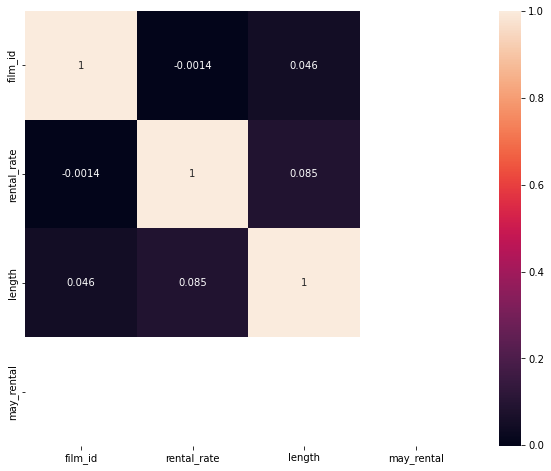

In [703]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data_may.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [704]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [705]:
y = data_may['title']
X = data_may.drop('title', axis=1)

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [720]:
X_num = X.select_dtypes(include = np.number)
X_cat = data_may.select_dtypes(include = object)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = np.object)
X_test_cat  = X_test_df.select_dtypes(include = np.object)



C:\Users\jasmi\AppData\Local\Temp\ipykernel_17476\2553161217.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train_df.select_dtypes(include = np.object)
C:\Users\jasmi\AppData\Local\Temp\ipykernel_17476\2553161217.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat  = X_test_df.select_dtypes(include = np.object)


In [721]:
transformer = MinMaxScaler().fit(X_train_num) 
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [722]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'category'],
                             drop_first=True)

X_train_cat

,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
96,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
478,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
486,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
277,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
167,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
189,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [723]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.91591592, 0.5       , 0.24460432, ..., 0.        , 0.        ,
        0.        ],
       [0.91491491, 1.        , 0.33093525, ..., 0.        , 0.        ,
        0.        ],
       [0.8038038 , 1.        , 0.5971223 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29429429, 0.        , 0.36690647, ..., 0.        , 0.        ,
        0.        ],
       [0.30730731, 0.5       , 0.69064748, ..., 0.        , 0.        ,
        0.        ],
       [0.35735736, 0.        , 0.84172662, ..., 0.        , 0.        ,
        0.        ]])

In [724]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [725]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [726]:
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'category'],
                            drop_first=True)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17476\1619590123.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


In [727]:
list(zip(list(X_train_cat.columns),list(X_test_cat.columns)))

[('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R'),
 ('category_Animation', 'category_Animation'),
 ('category_Children', 'category_Children'),
 ('category_Classics', 'category_Classics'),
 ('category_Comedy', 'category_Comedy'),
 ('category_Documentary', 'category_Documentary'),
 ('category_Drama', 'category_Drama'),
 ('category_Family', 'category_Family'),
 ('category_Foreign', 'category_Foreign'),
 ('category_Games', 'category_Games'),
 ('category_Horror', 'category_Horror'),
 ('category_Music', 'category_Music'),
 ('category_New', 'category_New'),
 ('category_Sci-Fi', 'category_Sci-Fi'),
 ('category_Sports', 'category_Sports'),
 ('category_Travel', 'category_Travel')]

In [728]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [729]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.0